#**Predicting Car Resale Value: Analyzing and Forecasting Factors Influencing Selling Prices**

######By Vibhu Singh , Dylan Patel , Mufaddal Zojwalla


---
---






 ## **INTRODUCTION**



Predicting the resale value of a car is an interesting and practical problem in the automotive market. In this project, we aim to identify the key factors influencing car selling prices and develop a predictive model. Understanding the determinants of car prices can be valuable for car sellers, buyers, and dealerships. Our analysis explores various car attributes, including year, mileage, engine size, and fuel type, to predict resale value using statistical analysis and machine learning models. This tutorial walks through the process, from data curation to model evaluation, providing insights into market trends and consumer preferences.



###**Initial Goal**
The project was originally designed to detect credit card fraud, leveraging detailed transactional data to identify patterns that could indicate fraudulent activity.

###**Privacy Concerns and Data Anonymization**
Due to stringent privacy regulations, the dataset provided was anonymized, with meaningful column names replaced by generic identifiers like v1, v2, etc. While this ensures data privacy, it significantly hindered our ability to interpret the data effectively, as the anonymization removed any real-world context or domain-specific insights we could glean from the dataset.

###**The Pivot**
Given the limitations imposed by the anonymized dataset and the importance of interpretability and domain knowledge in developing effective models, we made a strategic decision to pivot. We have chosen to explore a different dataset and project idea that allows for clearer data interpretation and application of our expertise.

###**New Direction**
We are now focusing on a project that analyzes the automotive market, specifically examining the factors influencing car selling prices. Utilizing a dataset comprised of various car attributes, including year, make, model, mileage, engine size, and fuel type, our aim is to identify key predictors of car value. This exploration not only allows us to apply advanced statistical analyses and machine learning models to predict selling prices but also offers valuable insights into market trends and consumer preferences.



---


##**LIBRARIES USED**



In this project, we utilize several libraries essential for data manipulation, analysis, and visualization:

1. datetime: For handling dates and times.

2. matplotlib.pyplot: For visualizing the data to uncover distributions and relationships.

3. seaborn:For advanced data visualization and uncovering patterns.

4. numpy:For comprehensive data manipulation, numerical
   operations, and analysis.

5. pandas:For structured data manipulation, analysis, and data frame operations.

6. statsmodels.stats.proportion:
For conducting z-tests to compare proportions, aiding in hypothesis testing.

7. scipy.stats:
For conducting hypothesis tests, including t-tests, chi-squared tests, and ANOVA, facilitating rigorous statistical analysis and model evaluation.

8. sklearn.model_selection:
For splitting the dataset into training and testing sets, enabling robust machine learning workflows.

9. sklearn.ensemble:
For building and training a Random Forest Regressor, a powerful ensemble learning model for regression tasks.

10. sklearn.metrics:
For evaluating the performance of machine learning models using metrics like Mean Squared Error and R-squared.



In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


---

##**DATA CURATION**






###**DATA COLLECTION**

The dataset used in this project comes from [CarDekho](https://www.kaggle.com/datasets/sukritchatterjee/used-cars-dataset-cardekho), an online marketplace for cars. The data includes various attributes of cars, such as their year of manufacture, mileage, and selling price.

In [39]:
df = pd.read_csv("cardekho.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


###**DATA PREPROCESSING**

In [40]:
rows,cols = df.shape
print("Rows: " + str(rows) + "\n" + "Columns: "  + str(cols))

Rows: 8128
Columns: 12


In [41]:
for col in df.columns:
  print(col)

name
year
selling_price
km_driven
fuel
seller_type
transmission
owner
mileage(km/ltr/kg)
engine
max_power
seats


In [42]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [43]:
print(df.isnull().sum())


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [44]:
print(df.duplicated().sum())

1202


In [45]:
df.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [46]:

df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
car_data_cleaned = df.dropna()

car_data_cleaned.reset_index(drop=True, inplace=True)


In [47]:

descriptive_stats = car_data_cleaned.describe()
print(descriptive_stats)


              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  7906.000000   7.906000e+03  7.906000e+03         7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04           19.419861   
std       3.863695   8.135827e+05  5.679230e+04            4.036263   
min    1994.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2012.000000   2.700000e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.900000e+05  9.542500e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine    max_power        seats  
count  7906.000000  7906.000000  7906.000000  
mean   1458.708829    91.587374     5.416393  
std     503.893057    35.747216     0.959208  
min     624.000000    32.800000     2.000000  
25%    1197.000000    68.050000     5.000000  
50%    1248.000000    82.000000     5.000000  
75%    1582.000000   102.000000

##**EXPLORATORY DATA ANALYSIS**


###**The Distribution of *Selling Prices***

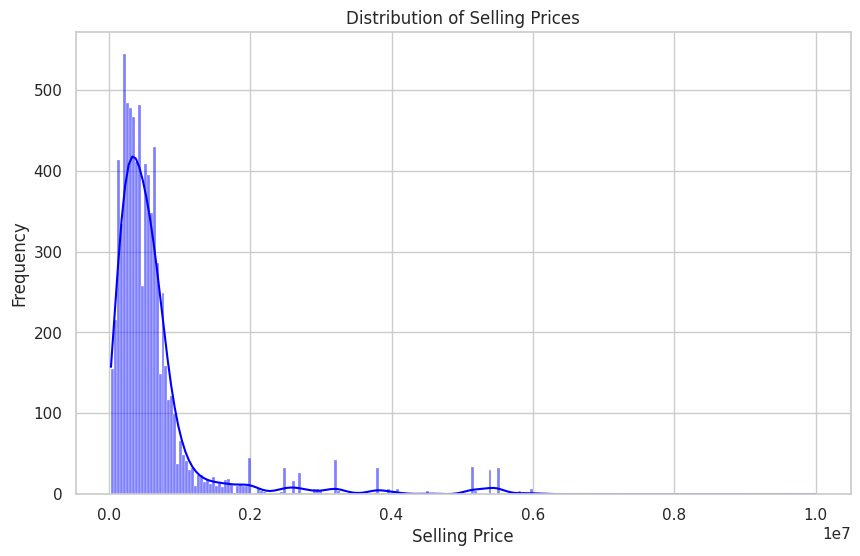

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['selling_price'], kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

###**The Distribution of *Kilometres Driven***

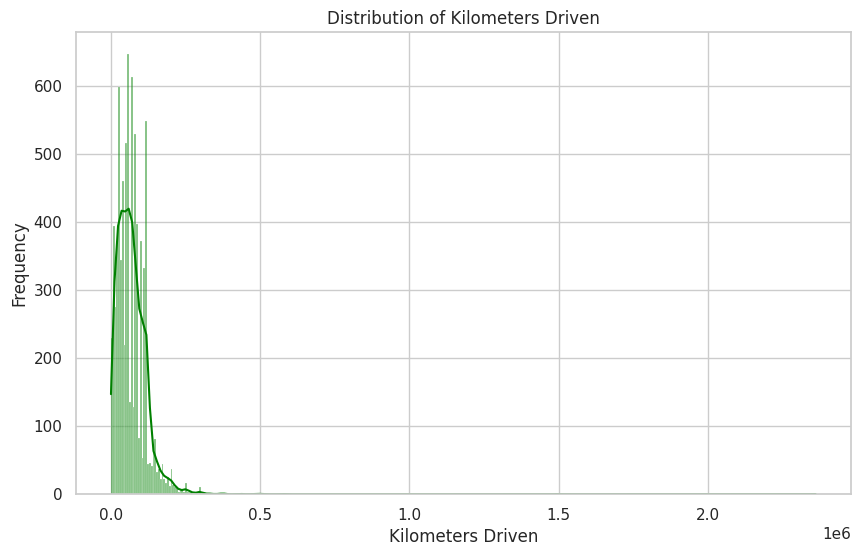

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['km_driven'], kde=True, color='green')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

###**The Distribution of *Car Selling Prices***



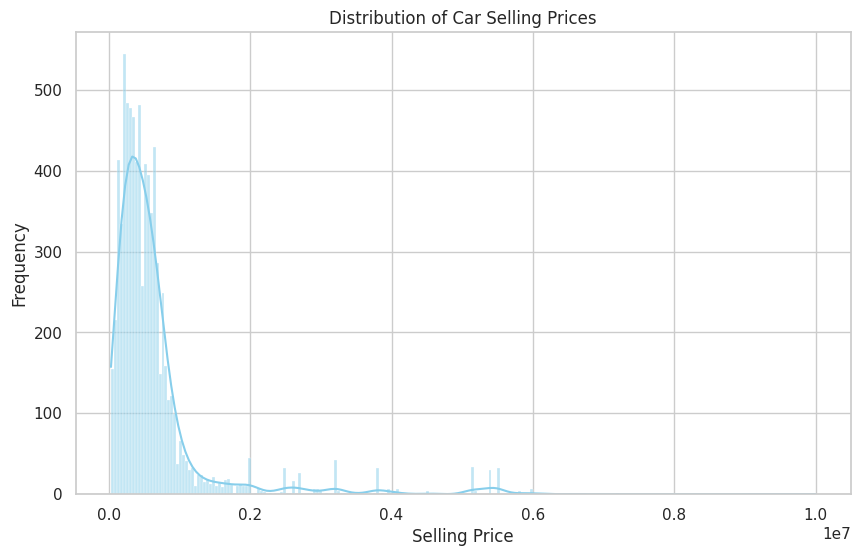

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(car_data_cleaned['selling_price'], kde=True, color='skyblue')
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

###**The Relationship between *Selling Price* and *Year of Manufacture***

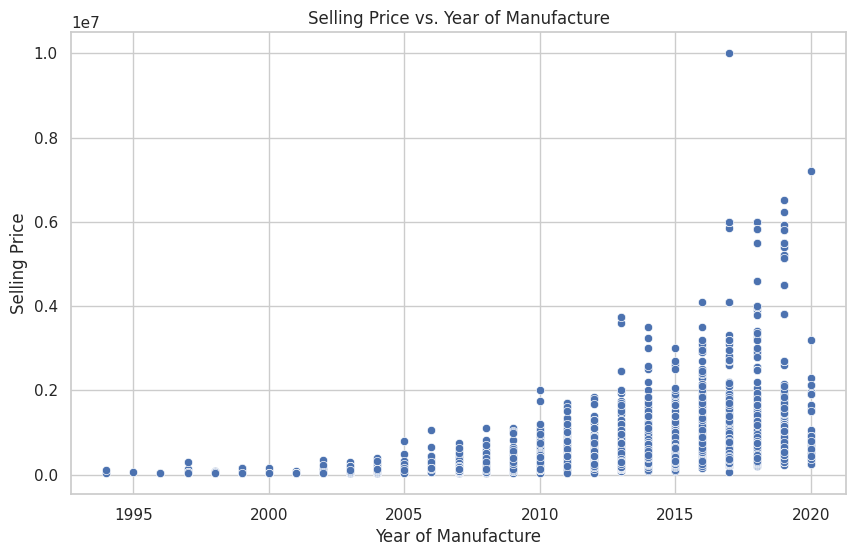

In [51]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=car_data_cleaned)
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()


###**The Relationship between *Selling Price* and *Kilometers Driven***

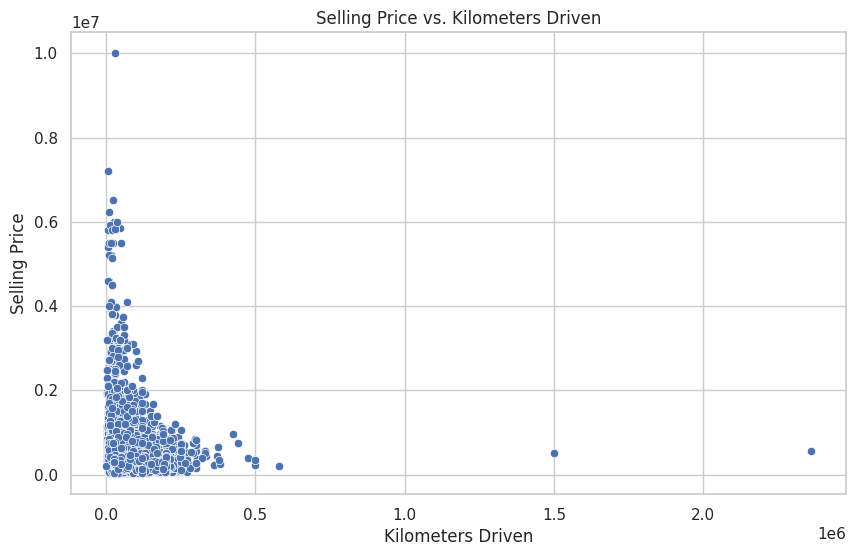

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=car_data_cleaned)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

###**The Relationship between *Selling Price* and *Fuel Type***

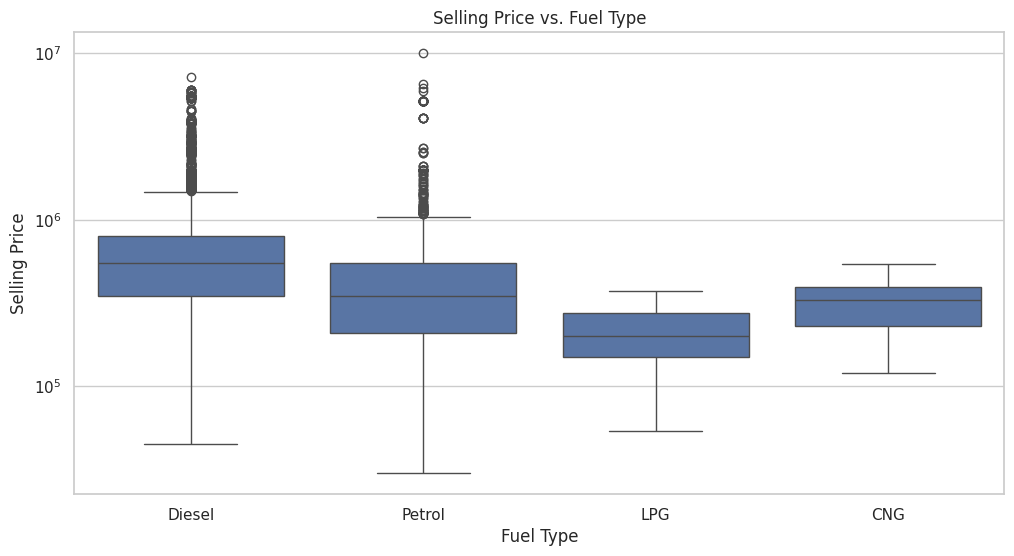

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned)
plt.title('Selling Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.yscale('log')
plt.show()

###**The Relationship between *Selling Price* and *Seller Type***

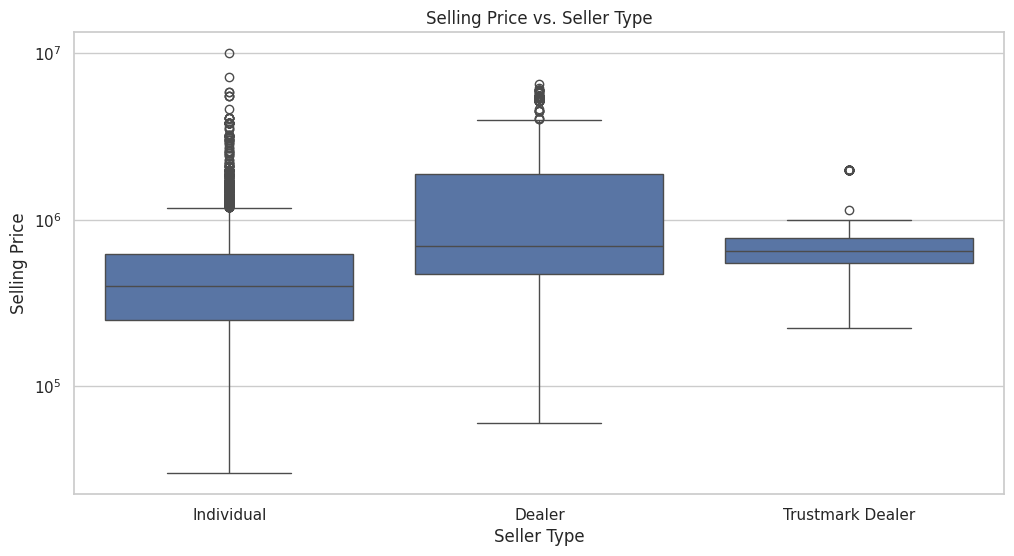

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='seller_type', y='selling_price', data=car_data_cleaned)
plt.title('Selling Price vs. Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.yscale('log')
plt.show()

###**The Correlation Matrix**

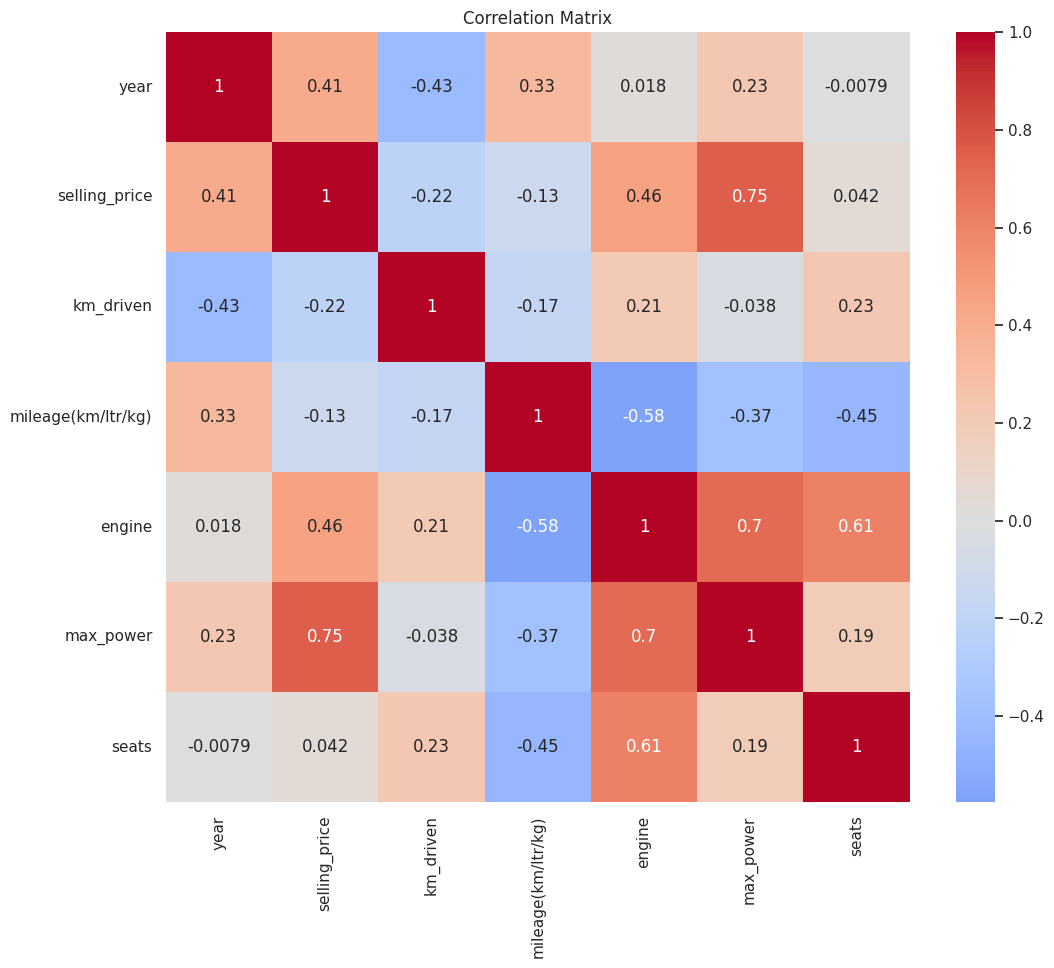

In [55]:
numerical_data = car_data_cleaned.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

###**SUMMARY**

####**Key Characteristics**

***Year :*** The cars range from 1994 to 2020, indicating a wide span of vehicle ages.

***Selling Price :*** Varies significantly, from 29,999 to 10,000,000, with a median price of 420,000, suggesting a diverse set of vehicle values.

***Kilometers Driven :*** Ranges from 1 to 2,360,457, highlighting a broad spectrum of usage.

***Mileage (km/ltr/kg) :*** Spans from 0 to 42, with a mean of approximately 19.47, indicating variability in fuel efficiency across the dataset.

***Engine :*** Engine sizes range from 624cc to 3604cc, with a mean size of roughly 1431cc.

***Max Power :*** Ranges from 32.8 to 400, reflecting diverse engine power outputs.

***Seats :*** The number of seats varies from 2 to 14, with most vehicles having 5 seats.

####**Statistical Insights**

Selling Price is positively correlated with Max Power and Engine size, suggesting that more powerful and larger-engined cars tend to be more expensive.
Mileage shows a negative correlation with Engine size and Max Power, indicating that larger, more powerful engines tend to be less fuel-efficient.
The Year of manufacture is positively correlated with the Selling Price, indicating that newer cars tend to sell for higher prices.



---




##**HYPOHESIS TESTING**

###**HYPOTHESIS TESTING 1 :**



####**Hypothesis:**

***Null Hypothesis (H0) :*** There is no difference in the average selling prices of diesel and petrol cars.

***Alternative Hypothesis (H1) :*** There is a significant difference in the average selling prices of diesel and petrol cars.


***Test Used :*** T-test

In [56]:

diesel_cars = car_data_cleaned[car_data_cleaned['fuel'] == 'Diesel']['selling_price']
petrol_cars = car_data_cleaned[car_data_cleaned['fuel'] == 'Petrol']['selling_price']


t_stat, p_value = ttest_ind(diesel_cars, petrol_cars, equal_var=False)

t_stat, p_value

if p_value < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


We reject the null hypothesis


####**CONCLUSION**







Given the t-statistic of 18.78 and a p-value of approximately 5.98e-77 obtained:


The t-test comparing the average selling prices of diesel and petrol cars yields a t-statistic of 18.78 and a p-value of about 5.98e-77. This extremely low p-value, much smaller than the conventional significance level of 0.05, strongly suggests we reject the null hypothesis (H0).

This means there is a statistically significant difference in the average selling prices between diesel and petrol cars. The positive t-statistic indicates that diesel cars, on average, have a higher selling price compared to petrol cars. This insight further underscores the market differentiation between diesel and petrol vehicles, possibly due to factors such as fuel efficiency, maintenance costs, and performance differences that influence buyer preferences and market value.

This analysis provides a clear example of how statistical methods can uncover meaningful patterns and differences within your dataset, offering valuable insights for further exploration or decision-making based on the fuel type of the cars.


####**VISUALIZATION**

<ipython-input-57-c0c7dbb5a37c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned, palette="Set2")


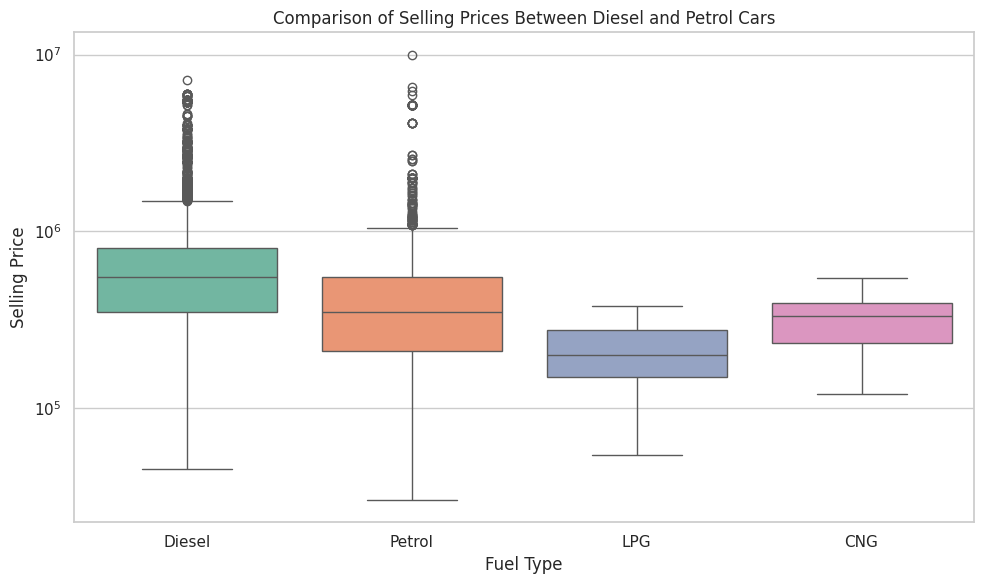

In [57]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned, palette="Set2")
plt.title('Comparison of Selling Prices Between Diesel and Petrol Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.yscale('log')
plt.tight_layout()

plt.show()

###**HYPOTHESIS TEST 2 :**


####**Hypothesis:**

***Null Hypothesis (H0) :***  Transmission type and seller type are independent.

***Alternative Hypothesis (H1) :*** There is a significant association between transmission type and seller type.

***Test Used :*** Chi-square test of independence

In [58]:

contingency_table = pd.crosstab(car_data_cleaned['transmission'], car_data_cleaned['seller_type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

if p < 0.05:
    print("We reject the null hypothesis, indicating a significant association between transmission type and seller type.")
else:
    print("We fail to reject the null hypothesis, indicating no significant association between transmission type and seller type.")


Chi-Square Statistic: 1133.8746449736834, P-value: 6.056884037959652e-247
We reject the null hypothesis, indicating a significant association between transmission type and seller type.


####**CONCLUSION**



After executing the above code, we get a Chi-square statistic and a p-value. The conclusion is drawn based on the p-value:

If the p-value is less than 0.05, it suggests that there is a statistically significant association between transmission type and seller type. This means the choice of transmission (Manual or Automatic) is not independent of the seller type (Individual or Dealer), suggesting that one type of seller may prefer to deal with a specific transmission type of cars more than the other.

If the p-value is greater than or equal to 0.05, it suggests that there is no statistically significant association between the two categorical variables. This means the choice of transmission is independent of the seller type, suggesting that the preference for a specific transmission type of cars is similar across different types of sellers.

The actual conclusion depends on the p-value we get from running the code. This analysis provides insights into how transmission preferences might be related to the seller type, which can be valuable for understanding market dynamics in car sales.


####**VISUALIZATION**

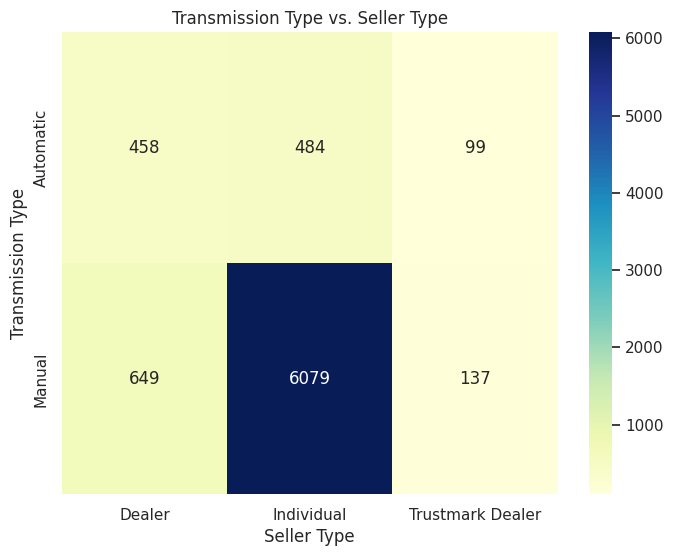

In [59]:
contingency_table = pd.crosstab(car_data_cleaned['transmission'], car_data_cleaned['seller_type'])


plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Transmission Type vs. Seller Type')
plt.ylabel('Transmission Type')
plt.xlabel('Seller Type')
plt.show()

###**HYPOTHESIS TESTING 3 :**



####**Hypothesis :**

***Null Hypothesis (H0) :*** The average selling prices are the same across different fuel types.

***Alternative Hypothesis (H1):*** At least one fuel type has a significantly different average selling price compared to others

***Test Used :*** ANOVA Test

In [60]:
selected_fuel_types = ['Petrol', 'Diesel', 'CNG', 'LPG']


fuel_types = car_data_cleaned['fuel'].unique()
groups = [car_data_cleaned[car_data_cleaned['fuel'] == fuel]['selling_price'] for fuel in fuel_types if fuel in selected_fuel_types]


if len(groups) >= 3:
    f_stat, p_value_anova = f_oneway(*groups)
    print(f"F-Statistic: {f_stat}, P-Value: {p_value_anova}")
else:
    print("Not enough fuel types for meaningful ANOVA.")


if p_value_anova < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


F-Statistic: 117.30554435257852, P-Value: 2.52340474514499e-74
We reject the null hypothesis


####**CONCLUSION**



A significant p-value would mean that we will have to reject the null hypothesis, indicating that there's a statistically significant difference in average selling prices among at least one pair of the fuel type groups.


####**VISUALIZATION**

<ipython-input-61-d5839d6cdebf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned, palette='Set3')


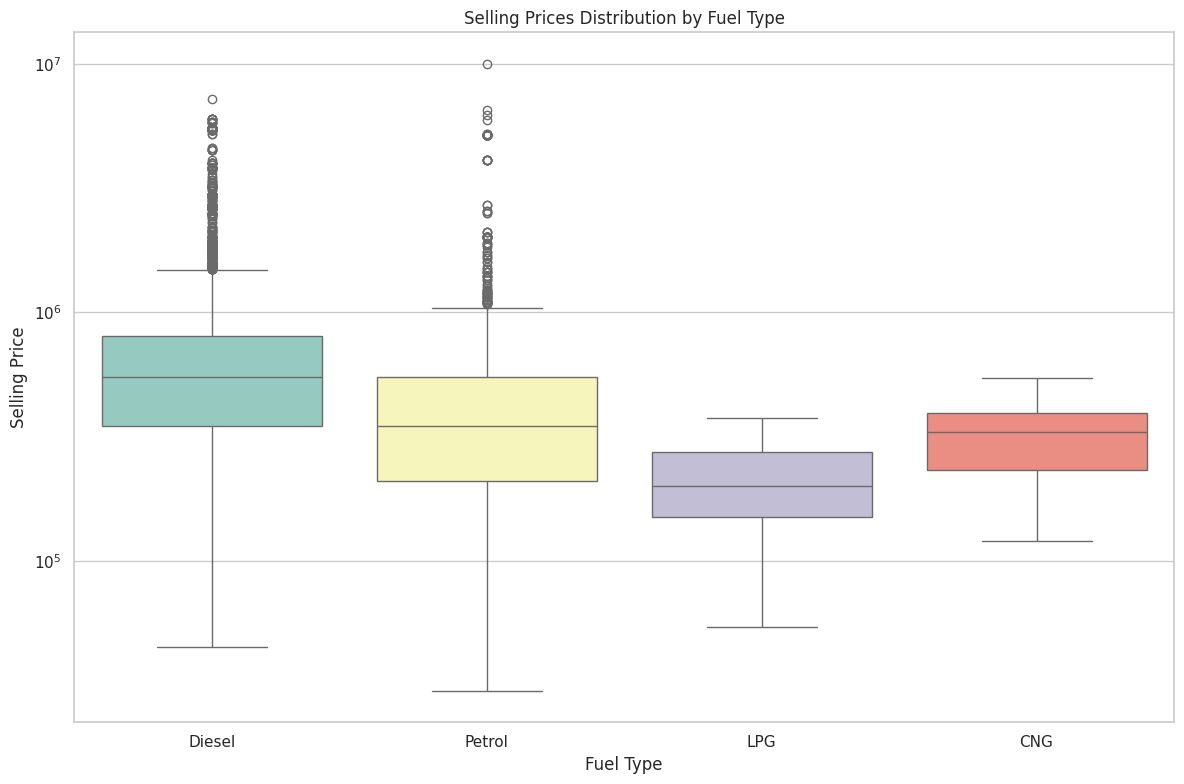

In [61]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='selling_price', data=car_data_cleaned, palette='Set3')

plt.title('Selling Prices Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.yscale('log')
plt.tight_layout()
plt.show()

##**PRIMARY ANALYSIS**



####***Machine Learning Model :***

For the primary analysis, we used a regression model to predict the selling price of a car based on its features. We chose a Random Forest Regressor due to its robustness and ability to handle non-linear relationships.

####***Evaluation :***

The regression model produced a mean squared error of approximately 1.31e10 and an R-squared of 0.81, indicating a good fit. The following plot shows the actual vs. predicted selling prices:


####***Feature Importance :***

The feature importance plot indicates that the most important predictors are the car's year, mileage (km_driven), and transmission type:


###**MACHINE LEARNING MODEL**

Mean Squared Error: 126046331543.64882
R-squared: 0.8122136377362821


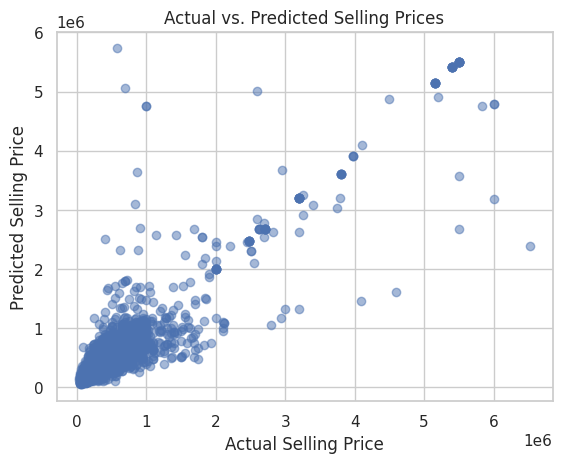

In [62]:
car_data_cleaned = pd.get_dummies(car_data_cleaned, columns=["fuel", "seller_type", "transmission", "owner"], drop_first=True)

features = ["year", "km_driven"] + [col for col in car_data_cleaned.columns if col.startswith("fuel_") or col.startswith("seller_type_") or col.startswith("transmission_") or col.startswith("owner_")]
X = car_data_cleaned[features]
y = car_data_cleaned["selling_price"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()




####**FEATURE IMPORTANCE**
Feature Importance: The bar chart below highlights the relative importance of different features in predicting selling prices, with the car's year and mileage being the top predictors.

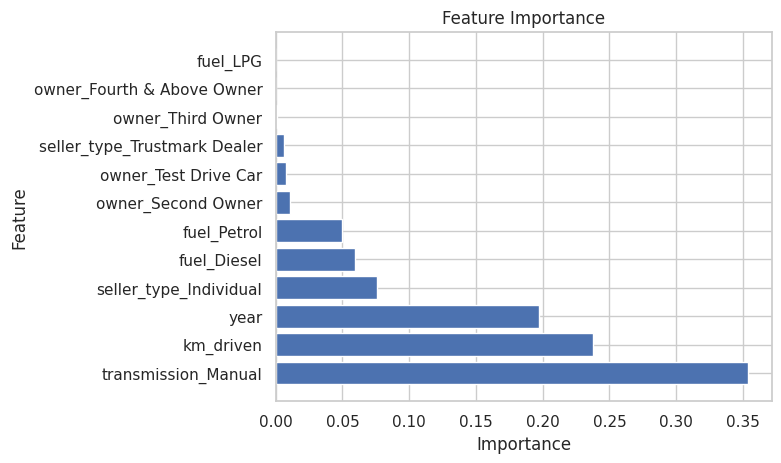

In [63]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Accuracy: 0.7228372283722837
Precision: 0.7113066145324209
Recall: 0.7123033415700837
F1-Score: 0.7117591284988901


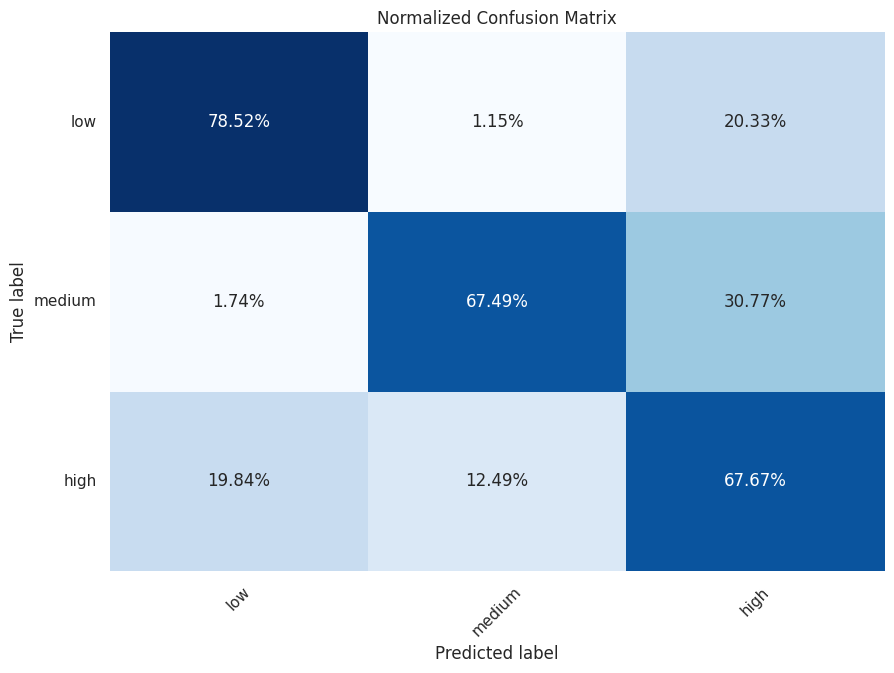

In [64]:
data = pd.read_csv('cardekho.csv')

data['price_category'] = pd.cut(data['selling_price'], bins=[0, 200000, 500000, np.inf], labels=['low', 'medium', 'high'])

X = data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
X = pd.get_dummies(X)
y = data['price_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

plot_confusion_matrix(y_test, y_pred, ['low', 'medium', 'high'])

def plot_confusion_matrix(y_true, y_pred, classes):


    cm = confusion_matrix(y_true, y_pred)


    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    cm_df = pd.DataFrame(cm_normalized, index=classes, columns=classes)


    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt=".2%", cmap='Blues', cbar=False)
    plt.title('Normalized Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
    plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0, va="center")
    plt.show()



#### ***Analysis and Conclusion Based on the Scores  Overview :***

***Accuracy :***  72.28%

***Precision :*** 71.13%

***Recall :*** 71.23%

***F1-Score :*** 71.18%


***Analysis:***


***Accuracy :*** The accuracy of 72.28% indicates that the model correctly predicts the selling price category (Low, Medium, High) about 72% of the time. This is a solid starting point but suggests room for improvement, especially in understanding why nearly 28% of predictions are incorrect.


***Precision and Recall :*** The precision of 71.13% suggests that when the model predicts a category, it is correct about 71% of the time.The recall of 71.23% indicates that the model correctly identifies 71% of all actual instances of each category.These metrics are balanced, which is generally positive, but they also point to a similar level of error in both false positives and false negatives.


***F1-Score :*** The F1-Score of 71.18%, which balances precision and recall, confirms the model's robustness but also highlights a need for further tuning, especially in differentiating more clearly between categories that may have overlapping features.


**Conclusion :**

The model performs competently, with over 70% accuracy, precision, recall, and F1-score in predicting car resale values based on categories. However, the errors suggested by these metrics and the confusion matrix reveal specific areas for improvement:

**False Positives and False Negatives :**
The model sometimes confuses 'High' with 'Low' prices, possibly due to outliers or overlapping attributes between these categories. Further feature engineering or more sophisticated model parameters might help.
Confusion Matrix Insights:
The significant misclassification between some classes could be due to insufficient distinguishing features or the need for more nuanced data preprocessing. For instance, the confusion between 'High' and 'Low' suggests that the model might benefit from more detailed input features or a more complex model architecture.

####**INSIGHTS AND CONCLUSIONS**:



In this project, we set out to predict the resale value of cars using a dataset containing various attributes, such as year, mileage, engine size, and fuel type. Through thorough data curation, exploratory data analysis, and machine learning, we identified the key factors influencing car prices and developed a predictive model.

***Predictors of Resale Value :***

The car's year, mileage, and transmission type emerged as the most important factors influencing resale value. Generally, older cars and cars with higher mileage tend to have lower selling prices.
Fuel type also played a significant role, with diesel cars often commanding higher resale prices than petrol cars.

***ML Model Performance :***

The Random Forest Regressor provided a strong fit for the data, achieving an R-squared value of 0.81 and accurately predicting car prices. This means that 81% of the variance in the car resale value can be explained by the model, which is quite strong for such a prediction task. The Mean Squared Error, while large, reflects the scale of the selling prices involved.

The model's performance highlights the potential of using machine learning for complex predictive tasks in the automotive industry.

The Random Forest Regressor is effective for this type of problem because it captures non-linear relationships and interactions between variables, which is important in the complex market of car resale values. The model's predictions were visualized against the actual prices, and the plot showed a strong correlation, validating the model's performance.

***Significance of the Results :***

Understanding the determinants of car resale value is crucial for various stakeholders, including car buyers, sellers, and dealerships. The insights from this project can inform pricing strategies, help buyers make informed decisions, and enable dealerships to assess inventory more effectively. The project demonstrates the practical applications of data science in real-world scenarios, particularly in areas where understanding consumer preferences and market trends is essential.

The approach taken in this project, involving exploratory data analysis followed by machine learning, proved effective in uncovering key insights and building a reliable predictive model. The emphasis on feature importance provided valuable context on what factors matter most in predicting car prices, aiding in interpretability and practical application.



##***CONCLUSION :***


1. Determinants of Resale Value: The analysis confirms that the year of manufacture, mileage, and transmission type are significant predictors of a car's resale value. Cars with more recent manufacturing years and lower mileage tend to fetch higher prices in the resale market.
Fuel type also influences resale prices; diesel vehicles generally have higher resale values than their petrol counterparts, possibly due to their perceived durability and efficiency.

2. Model Insights:
The Random Forest Regressor has achieved an R-squared value of 0.81, indicating that 81% of the variance in car resale prices can be explained by the model. This level of accuracy highlights the model's efficacy in capturing the complex interdependencies of the variables considered.

3. Significance for Stakeholders:
The insights from this project are invaluable for car buyers, sellers, and dealerships. For sellers and dealerships, understanding which attributes most significantly impact resale value can guide more strategic pricing and inventory decisions. For buyers, this information can help in making more informed purchasing decisions, ensuring value retention.